In [1]:
import pandas as pd
import opendatasets as od
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import model_from_yaml
!pip3 install PyYAML

In [2]:
od.download("https://www.kaggle.com/saurabhbagchi/ship-and-iceberg-images")

Skipping, found downloaded files in "./ship-and-iceberg-images" (use force=True to force download)


In [3]:
import os
for dirname, _, filenames in os.walk('/home/apprenant/PycharmProjects/ClimateProject---E3/ship-and-iceberg-images/input_data.npz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 # Load the data

In [4]:
npz = np.load('/home/apprenant/PycharmProjects/ClimateProject---E3/Data analysis/ship-and-iceberg-images/input_data.npz')

x = npz['X_train']
y = npz['Y_train']
del npz

In [5]:
print(type(x))

<class 'numpy.ndarray'>


In [6]:
print('shape of picture: {}'.format(x.shape))
print('shape of picture: {}'.format(y.shape))

shape of picture: (4113, 75, 75, 3)
shape of picture: (4113,)


In [7]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)
X_val = X_train
y_val = y_train
# Second split the 20% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.8, random_state=1, stratify=y_valtest)

In [8]:
print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)

(3290, 75, 75, 3)
(659, 75, 75, 3)
(164, 75, 75, 3)
(3290,)
(659,)
(164,)


In [9]:
ix = 100#0-4112
labels = ['Ship','Iceberg']  #0 is no iceberg(ship) and 1 is iceberg
print ('This is:',labels[int(y_train[ix])])

This is: Iceberg


In [10]:
K.image_data_format()

'channels_last'

In [11]:
img_width, img_height = 75, 75
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
epochs = 50
batch_size = 32

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.add(layers.Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['accuracy']);


/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


DATA AUGMENTATION

In [13]:
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, rotation_range=30)
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

In [15]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=6) # stops after 6 rounds of no improvements

In [16]:
history = model.fit(
    X_train, y_train, 
    batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=early_stopping,
);

#model.save_weights('weights.h5')

Epoch 1/50
103/103 [==============================] - 9s 80ms/step - loss: 0.6174 - accuracy: 0.6523 - val_loss: 0.4965 - val_accuracy: 0.7876
Epoch 2/50
103/103 [==============================] - 8s 79ms/step - loss: 0.4268 - accuracy: 0.8109 - val_loss: 0.4194 - val_accuracy: 0.7997
Epoch 3/50
103/103 [==============================] - 8s 78ms/step - loss: 0.3351 - accuracy: 0.8553 - val_loss: 0.2894 - val_accuracy: 0.8725
Epoch 4/50
103/103 [==============================] - 8s 78ms/step - loss: 0.2960 - accuracy: 0.8657 - val_loss: 0.2712 - val_accuracy: 0.8801
Epoch 5/50
103/103 [==============================] - 8s 79ms/step - loss: 0.3023 - accuracy: 0.8626 - val_loss: 0.3127 - val_accuracy: 0.8604
Epoch 6/50
103/103 [==============================] - 8s 78ms/step - loss: 0.2629 - accuracy: 0.8809 - val_loss: 0.2556 - val_accuracy: 0.8923
Epoch 7/50
103/103 [==============================] - 8s 79ms/step - loss: 0.2433 - accuracy: 0.8933 - val_loss: 0.2390 - val_accuracy: 0.8938

# RUN CNN

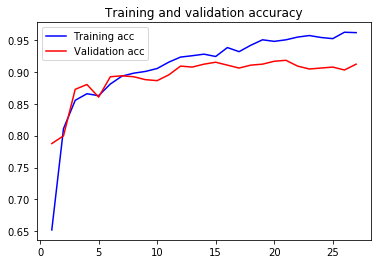

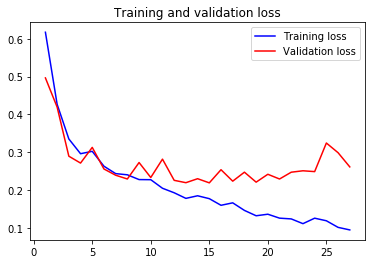

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# ÉVALUATION

In [18]:
print(history.history)

{'loss': [0.6174255013465881, 0.42675620317459106, 0.3350861370563507, 0.29598531126976013, 0.30228739976882935, 0.26288488507270813, 0.24329861998558044, 0.24017395079135895, 0.22751912474632263, 0.22721274197101593, 0.20455896854400635, 0.19261865317821503, 0.17780102789402008, 0.184665247797966, 0.17702338099479675, 0.1594814658164978, 0.1659688949584961, 0.14594696462154388, 0.131768599152565, 0.13586655259132385, 0.12545588612556458, 0.12343578040599823, 0.11088460683822632, 0.12536294758319855, 0.11852312833070755, 0.10105964541435242, 0.09431850165128708], 'accuracy': [0.6522796154022217, 0.8109422326087952, 0.8553191423416138, 0.8656535148620605, 0.8626139760017395, 0.8808510899543762, 0.8933130502700806, 0.8978723287582397, 0.9006078839302063, 0.9051671624183655, 0.9151975512504578, 0.9231002926826477, 0.92522794008255, 0.9276595711708069, 0.9240121841430664, 0.9379939436912537, 0.9316109418869019, 0.9416413307189941, 0.9501519799232483, 0.9477203488349915, 0.9501519799232483,

In [19]:


#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()



,loss,accuracy,val_loss,val_accuracy
0,0.617426,0.652280,0.496549,0.787557
1,0.426756,0.810942,0.419367,0.799697
2,0.335086,0.855319,0.289430,0.872534
3,0.295985,0.865654,0.271206,0.880121
4,0.302287,0.862614,0.312701,0.860395


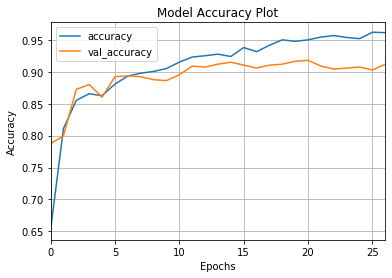

In [20]:
#plot the accuracy over the training and test set
results[["accuracy",'val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

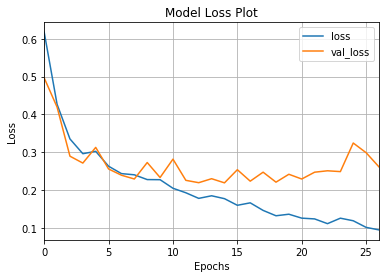

In [21]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [22]:
img1 = X_train[0,:,:,:]
img1 = img1.reshape(-1,75,75,3)
model.predict(img1)
print(img1.shape)

(1, 75, 75, 3)


In [23]:
def prediction(id, model):
    img1 = X_train[id,:,:,:]
    img1 = img1.reshape(-1,75,75,3)
    return model.predict(img1)[0][0]

In [24]:
print(prediction(1, model))
print(prediction(2, model))
print(prediction(0, model))
print(prediction(4, model))


0.074880034
5.7340065e-05
0.0004593134
0.99986637


In [25]:
for i in range(10):
    print(prediction(i, model), round(prediction(i, model)))

0.0004593134 0
0.074880034 0
5.7340065e-05 0
0.00036138296 0
0.99986637 1
0.9892528 1
0.998507 1
0.012827575 0
0.99989414 1
0.00015828013 0


In [26]:
model.predict(img1)

array([[0.00045931]], dtype=float32)

In [27]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("/home/apprenant/PycharmProjects/ClimateProject---E3/model/model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/model.h5")
print("Saved model to disk")

Saved model to disk


In [110]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.h5")

In [28]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json, load_model
import tensorflow.keras.backend as K
import numpy as np
from imageio import imread, imsave
from PIL import Image
import re
import pandas
import sys
import os

In [111]:
def init():
    json_file = open('/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model_json = model_from_json(loaded_model_json)
    #load weights into new model
    loaded_model_json.load_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.h5")
    print("Loaded Model from disk")

    #compile and evaluate loaded model
    loaded_model_json.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return loaded_model_json

In [112]:
def predict(path):
    x = imread(path)
    x = np.resize(x,(1,75,75,3))
    model=init()
    out = model.predict(x)[0][0]
    perf = model.predict(x)[0][0]
    return round(out),  perf

In [113]:
def predicted(id, model):
    x = X_train[id,:,:,:]
    x = np.resize(x,(1,75,75,3))
    out = model.predict(x)[0][0]
    return round(out)

In [104]:
X_train[0,:,:,:].shape

(75, 75, 3)

In [105]:
predicted(5, model)

1

In [114]:
predict('/home/apprenant/Downloads/1.png')

Loaded Model from disk


(0, 0.0008367896)

In [115]:
predict('/home/apprenant/Downloads/1.png')

Loaded Model from disk


(0, 0.0008367896)

In [116]:
predict('/home/apprenant/Downloads/3.png')

Loaded Model from disk


(1, 1.0)

In [117]:
predict('/home/apprenant/Downloads/5.png')

Loaded Model from disk


(1, 0.99999154)